In [1]:
import pandas as pd

In [2]:
dataset = "survey lung cancer.csv"
df = pd.read_csv(dataset)

In [3]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [14]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is stored in a DataFrame named 'df'
# Replace 'your_dataset.csv' with the actual file path or DataFrame variable if needed

# Read the dataset
# df = pd.read_csv('your_dataset.csv')

# Encode the target variable
le = LabelEncoder()
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['GENDER'])

# Features and target variable
X = df.drop('LUNG_CANCER', axis=1)  # Features
y = df['LUNG_CANCER']  # Target variable

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', C=1.0)

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = svm_model.predict(X_test)

# Evaluasi model SVM
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)


Accuracy: 0.967741935483871
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [17]:
svr_model = SVR(C=1000, gamma=0.05, kernel='rbf')

# Melatih model
svr_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_svr_pred = svr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_svr_pred)
print(f'Mean Squared Error (SVM): {mse}')


Mean Squared Error (SVM): 0.07045621807848608


Mean Squared Error (SVR): 0.07045621807848608


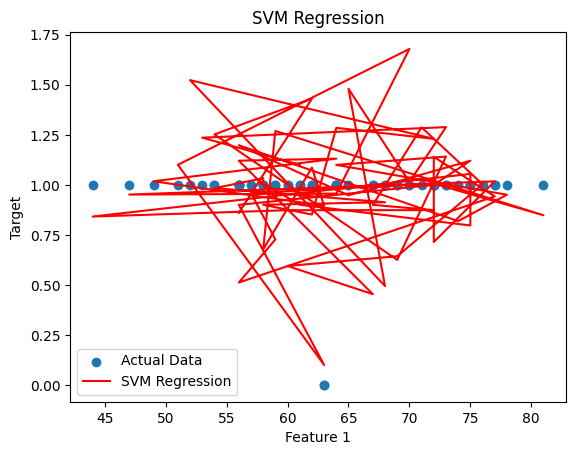

In [21]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the dataset
# df = pd.read_csv('your_dataset.csv')

# Encode the target variable
le = LabelEncoder()
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])

# Check if 'GENDER' column exists before dropping it
if 'GENDER' in df.columns:
    # Drop the original 'GENDER' column if it's not needed anymore
    df.drop('GENDER', axis=1, inplace=True)

# Features and target variable
X = df.drop('LUNG_CANCER', axis=1)  # Features
y = df['LUNG_CANCER']  # Target variable

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr_model = SVR(C=1000, gamma=0.05, kernel='rbf')

svr_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_svr_pred = svr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_svr_pred)
print(f'Mean Squared Error (SVR): {mse}')

# Visualisasi data dan model
plt.scatter(X_test.iloc[:, 0], y_test, label='Actual Data')  # Adjust the feature index accordingly
plt.plot(X_test.iloc[:, 0], y_svr_pred, color='red', label='SVM Regression')

# Label sumbu
plt.xlabel('Feature 1')  # Adjust the feature index accordingly
plt.ylabel('Target')

# Menambahkan judul
plt.title('SVM Regression')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV

# Tentukan hyperparameter yang akan diuji
param_grid = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

mencari parameter terbaik
grid_search = GridSearchCV(svr_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Tampilkan parameter
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Gunakan model terbaik untuk membuat prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Parameters: {'C': 10000, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Squared Error on Test Set: 0.04818633971261871


In [23]:
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, gamma=0.005)

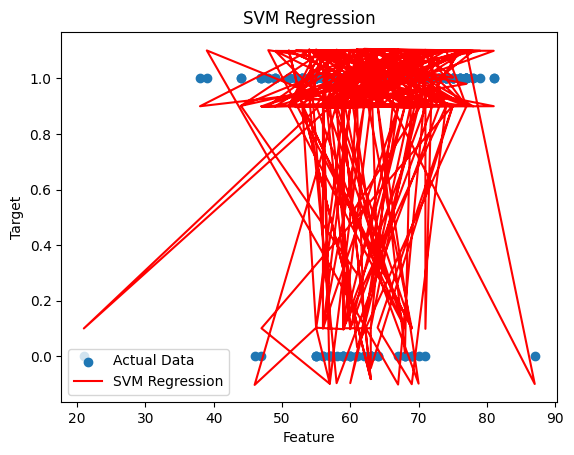

In [25]:
import matplotlib.pyplot as plt

# Visualisasi data aktual
plt.scatter(X.iloc[:, 0], y, label='Actual Data')  # Adjust the feature index accordingly

# Visualisasi hasil prediksi dari model SVM
plt.plot(X.iloc[:, 0], model_baru.predict(X), color='red', label='SVM Regression')  # Adjust the feature index accordingly

# Label sumbu
plt.xlabel('Feature')
plt.ylabel('Target')

# Menambahkan judul
plt.title('SVM Regression')

plt.legend()

plt.show()
